In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data = pd.read_csv('house_data.csv', index_col=0)
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# The Predictor and the target variable
X = data['sqft_living']
Y = data['price']

# convert X and Y to numpy array
X = np.array(X)
Y = np.array(Y)

# Make Scaling for the X data
dataMeanX = np.mean(X)
dataStdX = np.std(X)

X = (X - dataMeanX) / dataStdX 

# Cost Function Equation
<div>
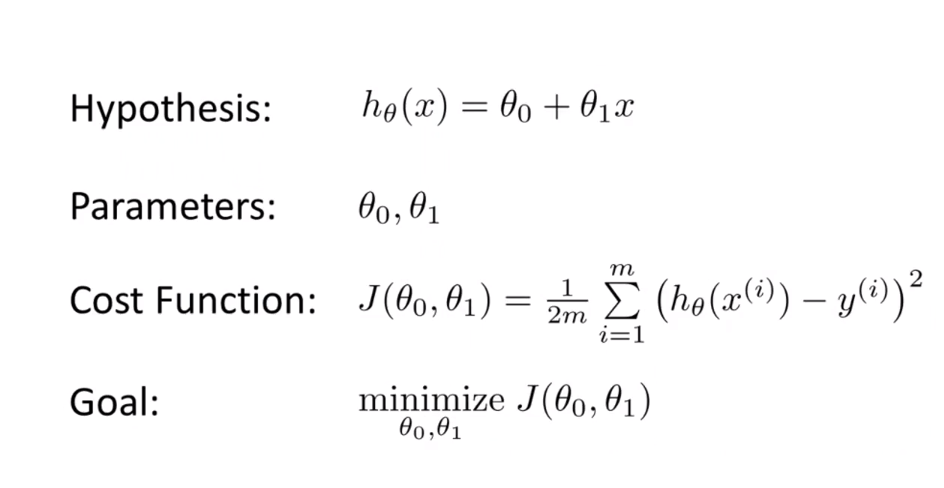
</div>

In [8]:
def hypothesis(theta_0, theta_1):
    return theta_0 + theta_1 * X

In [9]:
# calculate the cost function for the predcitor
def cost_func(hypo, y, m):
    sum_mean = 0
    for i in range(m):
        sum_mean += hypo[i] - y[i]
    sum_mean =  sum_mean / (m)
    return sum_mean

In [10]:
def square_error(hypo, y, m):
    sum_mean = 0
    for i in range(m):
        sum_mean += (hypo[i] - y[i]) ** 2
    sum_mean = sum_mean / (2 * m)
    return sum_mean

The Errors of Learning rate 0.1 is [213235671551.19724, 179214266205.60846, 151656927875.68256, 129335483828.44052, 111255114150.17558, 96610014710.78111, 84747484164.8719, 75138834422.68488, 67355828131.51343, 61051593035.66437, 55945162608.02692, 51808953961.640976, 48458624958.0679, 45744858465.17371, 43546707605.929756, 41766205409.94157, 40323998631.19168, 39155811140.4037, 38209579272.86569, 37443131460.16036, 36822308731.86839, 36319442321.952385, 35912120529.919716, 35582189878.37395, 35314946050.62169, 35098478550.14247, 34923139874.754295, 34781115547.68974, 34666075842.76765, 34572893681.78038, 34497416131.38089, 34436279315.55715, 34386758494.740135, 34346646629.878506, 34314156019.340343, 34287838624.804317, 34266521535.230324, 34249254692.675472, 34235268550.20585, 34223939774.805355, 34214763466.731037, 34207330657.191204, 34201310081.463455, 34196433415.124096, 34192483315.3895, 34189283734.604446, 34186692074.168064, 34184592829.214806, 34182892440.802944, 34181515126.

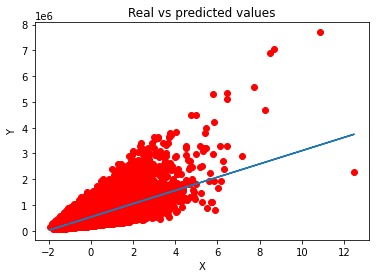

In [38]:
theta_1=0
theta_0=0
learning_rate = 0.06
iterations = 600
l_r = [0.1, 0.6, 0.06, 0.01]
errors = []
for i in l_r:
    theta_0 = 0
    theta_1 = 0
    errors.clear()
    for j in range(iterations):
        hypo = hypothesis(theta_0, theta_1)
        tmp_0 = theta_0 - i * cost_func(hypo, Y, Y.size)
        tmp_1 = theta_1 - i * cost_func(hypo * X, Y * X, Y.size)
        theta_0 = tmp_0
        theta_1 = tmp_1
        errors.append(square_error(hypo, Y, Y.size))
    print(f"The Errors of Learning rate {i} is {errors}")
    print(f"The new {theta_0} - {theta_1}")



plt.xlabel("X")
plt.ylabel("Y")
plt.title("Real vs predicted values")
plt.scatter(X, Y, color='r')
plt.plot(X, theta_0 + theta_1 * X)
plt.show()

[213235671551.19724, 209672376991.31827, 206179991993.17914, 202757105456.50424, 199402334361.90707, 196114323212.09406, 192891743484.16284, 189733293092.81622, 186637695864.25757, 183603701020.5493, 180630082674.2284, 177715639333.00012, 174859193414.26138, 172059590769.3075, 169315700216.98752, 166626413086.6582, 163990642770.2222, 161407324283.0834, 158875413833.83768, 156393888402.53275, 153961745327.3111, 151578001899.28717, 149241694965.48016, 146951880539.65463, 144707633420.90594, 142508046819.8177, 140352231992.09305, 138239317879.4379, 136168450757.62694, 134138793891.53882, 132149527197.08598, 130199846909.8528, 128288965260.33514, 126416110155.64317, 124580524867.53532, 122781467726.6593, 121018211822.88667, 119290044711.60086, 117596268125.82863, 115936197694.11269, 114309162663.98975, 112714505630.9646, 111151582272.89703, 109619761089.65521, 108118423147.95949, 106646961831.30421, 105204782594.84998, 103791302725.20134, 102405951104.95828, 101048167981.95871, 99717404743

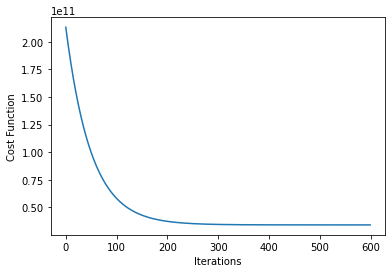

In [39]:
plt.plot(np.arange(iterations), errors)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
print(errors)

In [40]:
x = np.array(data['sqft_living'])
x = (x - dataMeanX) / dataStdX
predicted = theta_0 + theta_1 * x
data['predicted'] = predicted
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predicted
id,,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,286863.494417
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,675992.139613
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,172084.541517
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,505223.453592
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,426837.827221
